#### Navid Al-Musabbir 1721853042
#### Md. Rubel Rana 1712661642

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

### Dataset Import

In [2]:
data = 'dataset/Potato/potato.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,2,21880,1969,30.750,14.100,8.00,70.50,0.6,1.575,9.200000,20,67595,3.089351005
1,4,22510,1969,31.400,16.950,14.00,76.25,0.3,0.700,7.400000,10,72025,3.199689027
2,5,38940,1969,30.025,14.775,6.50,69.25,0.6,1.875,9.125000,9,268925,6.906137648
3,6,16465,1969,28.975,13.250,24.50,73.50,0.2,0.600,6.724000,37,49960,3.034315214
4,7,2490,1969,28.900,14.625,18.25,75.00,0.5,1.350,7.476724,9,7105,2.853413655


In [5]:
df.tail()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
681,12,2415,2012,29.250,12.425,29.00,81.00,1.800,1.375,6.000,14,10827,4.483229814
682,13,1417,2012,31.325,15.000,19.00,79.75,2.275,1.475,7.275,3,10671,7.530698659
683,14,86393,2012,29.725,12.775,31.00,79.00,1.850,1.600,6.025,20,783720,9.071568298
684,16,128724,2012,28.975,13.125,3.50,79.00,1.775,1.800,5.425,34,1143156,8.880674932
685,17,3205,2012,31.625,15.225,13.75,74.50,3.000,2.050,6.900,35,14310,4.464898596


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     686 non-null    int64  
 1   Area         686 non-null    int64  
 2   Year         686 non-null    int64  
 3   Max_Temp     686 non-null    float64
 4   Min_Temp     686 non-null    float64
 5   Rainfall     686 non-null    float64
 6   Humidity     686 non-null    float64
 7   Wind         686 non-null    float64
 8   Cloud        686 non-null    float64
 9   Sunshine     686 non-null    float64
 10  ALT          686 non-null    int64  
 11  Productions  686 non-null    int64  
 12  PPH          686 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 69.8+ KB


In [7]:
df= df[df['Area'] != 0]
df= df[df['Productions'] != 0]
df['PPH'] = pd.to_numeric(df['PPH'])

In [8]:
#defining response and predictor variables
X = df[['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = df[['PPH']]

### Checking number of principal components and MSE

In [9]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [10]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [11]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

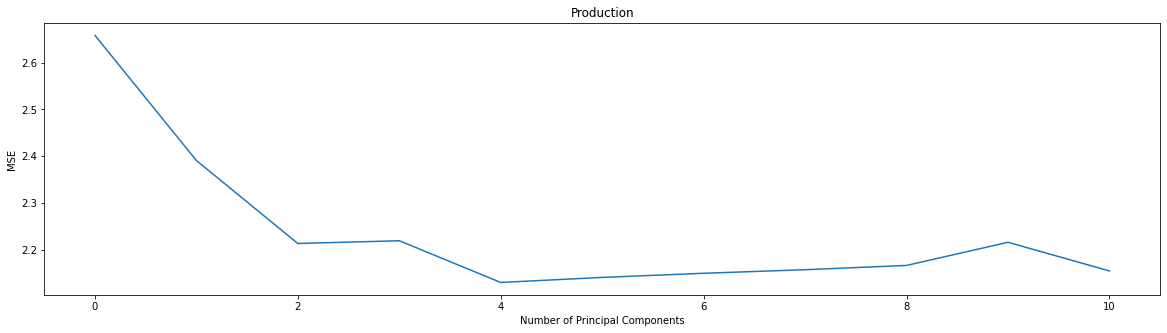

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Production')

In [13]:
#spliting the dataset
rng = np.random.RandomState(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=rng)

In [14]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [15]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [16]:
pred = regr.predict(X_reduced_test)
print("MSE =", np.sqrt(mean_squared_error(y_test, pred)))

MSE = 1.54226334270605


In [17]:
print("MAE =", mae(y_test, pred))

MAE = 1.20710928462734


### PCR RMSE, R Squared, MAE Values using 5th component

In [18]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']

In [19]:
#calculating RMSE
pcr.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pcr.predict(scale(X_test)))))

RMSE = 1.3950720768580076


In [20]:
#calculating R2
pcr.fit(X_train, y_train)

print("R2 =", pcr.score(X_test, y_test))

R2 = 0.2738013341967268


In [21]:
#calculating MAE
pcr.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pcr.predict(scale(X_test))))

MAE = 1.0932333789645308


### Plot

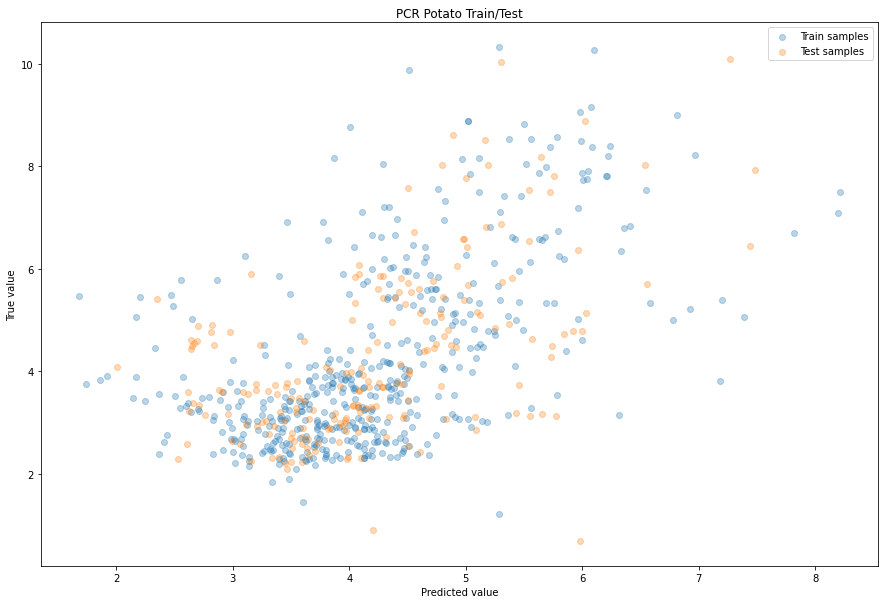

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(pcr.predict(scale(X_train)), y_train, alpha=.3, label="Train samples")
plt.scatter(pcr.predict(scale(X_test)), y_test, alpha=.3, label="Test samples")
plt.title('PCR Potato Train/Test')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.savefig("figures/pcr_potato.png")
plt.show()

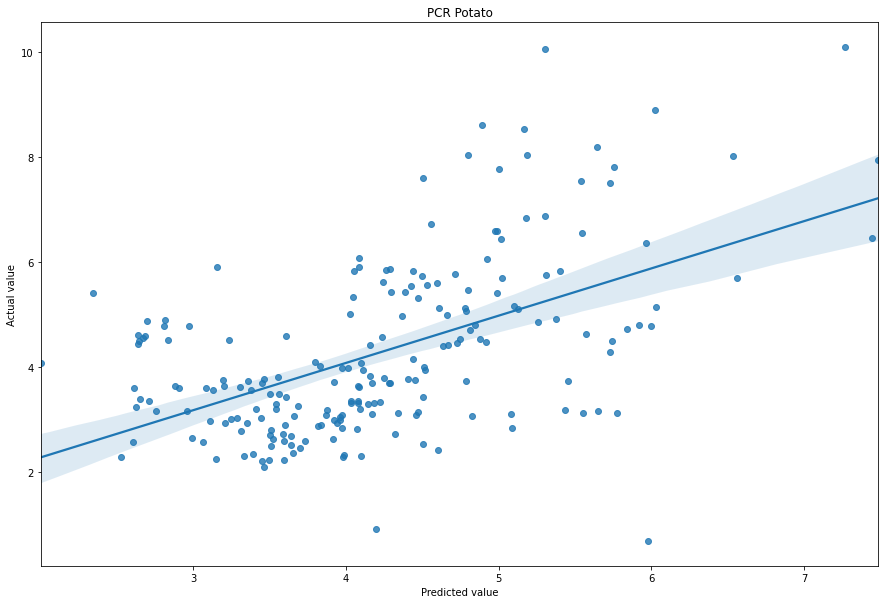

In [23]:
plt.figure(figsize=(15,10))
sns.regplot(x=pcr.predict(scale(X_test)), y = y_test, data = df)
plt.title('PCR Potato')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/pcr_potato_2.png")

### Checking number of principal components and MSE

In [24]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(X)

In [25]:
for i in np.arange(1, 12):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

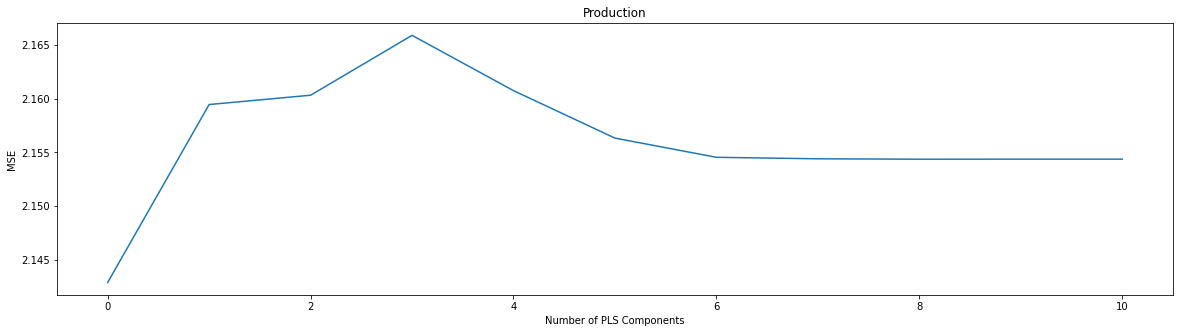

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Production')

### PLSR RMSE, R Squared, MAE Values Using 7th Component

In [27]:
#calculating RMSE
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

RMSE = 1.4252296669556686


In [28]:
#calculating R2
pls = PLSRegression(n_components=7)
pls.fit((X_train), y_train)

print("R2 =", pls.score(X_test, y_test))

R2 = 0.14937396908120282


In [29]:
#calculating MAE
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pls.predict(scale(X_test))))

MAE = 1.0448358181574955


### Plot

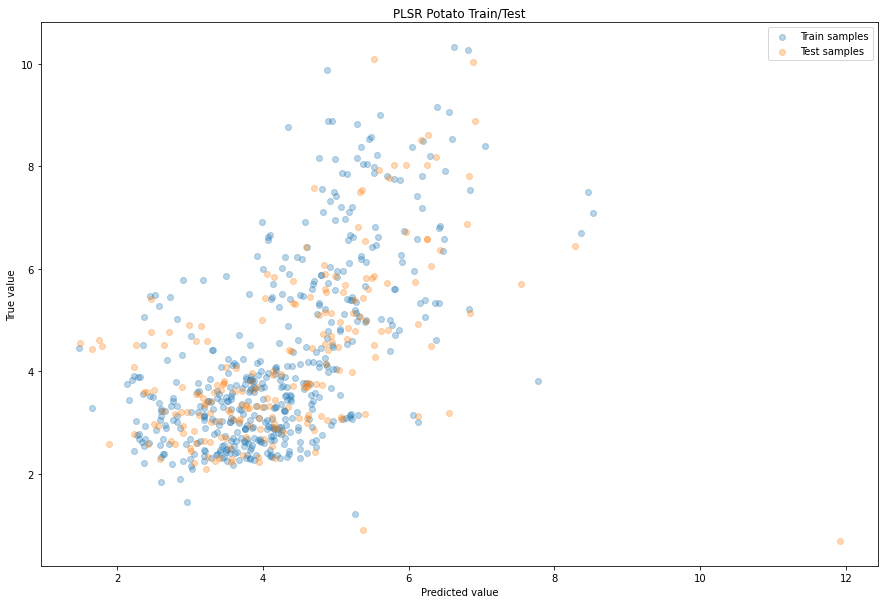

In [30]:
pls = PLSRegression(n_components=7)
pls.fit(X_train, y_train)

plt.figure(figsize=(15,10)) 
plt.scatter(pls.predict(X_train), y_train, alpha=.3, label="Train samples") 
plt.scatter(pls.predict(X_test), y_test, alpha=.3, label="Test samples")  
plt.title('PLSR Potato Train/Test')
plt.xlabel("Predicted value") 
plt.ylabel("True value") 
plt.legend()
plt.savefig("figures/plsr_potato.png")
plt.show()

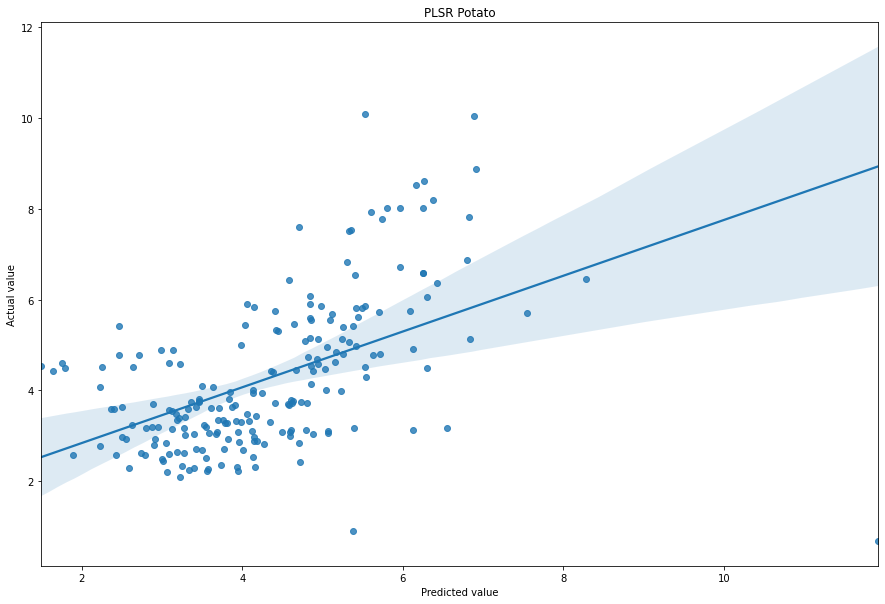

In [31]:
plt.figure(figsize=(15,10))
sns.regplot(x=pls.predict(X_test), y = y_test, data = df)
plt.title('PLSR Potato')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/plsr_potato_2.png")